In [52]:
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, Polygon

Dataset downloaded from the [US Census Bureau](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

* Official [geopandas tutorial](https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html)
* Annotation [tutorial](https://jcutrer.com/python/learn-geopandas-plotting-usmaps)

In [53]:
gdf = gpd.read_file('data/usa_state_geodf/tl_2021_us_state.shp')
gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


In [54]:
# get the area of each Polygon
gdf['area'] = gdf['geometry'].area
# Boundary of each polygon
gdf['boundary'] = gdf['geometry'].boundary
gdf['centroid'] = gdf.centroid

<ipython-input-54-56bbe2233264>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf['geometry'].area
<ipython-input-54-56bbe2233264>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


In [55]:
# For funsies, calculate how far each county is from NY state
ny_loc = gdf[gdf['NAME'].str.contains('New York')].index[0] # get index of NYC
gdf['distance_to_ny'] = gdf['centroid'].distance(gdf['centroid'].iloc[ny_loc]) # use centroid of NYC to calc distance

<ipython-input-55-d16cb456432e>:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_ny'] = gdf['centroid'].distance(gdf['centroid'].iloc[ny_loc]) # use centroid of NYC to calc distance


In [56]:
gdf['distance_to_ny'].describe()

count     56.000000
mean      29.418642
std       42.949273
min        0.000000
25%        7.359268
50%       17.703996
75%       31.744119
max      222.727144
Name: distance_to_ny, dtype: float64

# Maps

In [77]:
non_cont = [
    'United States Virgin Islands',
    'Commonwealth of the Northern Mariana Islands',
    'American Samoa',
    'Puerto Rico',
    'Guam',
    'Hawaii',
    'Alaska'
]

In [79]:
gdf = gdf[~gdf['NAME'].isin(non_cont)]

<AxesSubplot:>

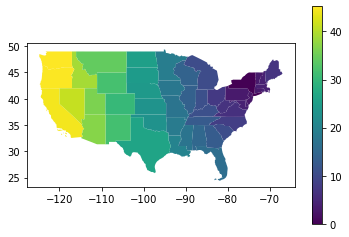

In [86]:
gdf.plot('distance_to_ny', legend=True)

Text(0.5, 1.0, 'Distance to New York State')

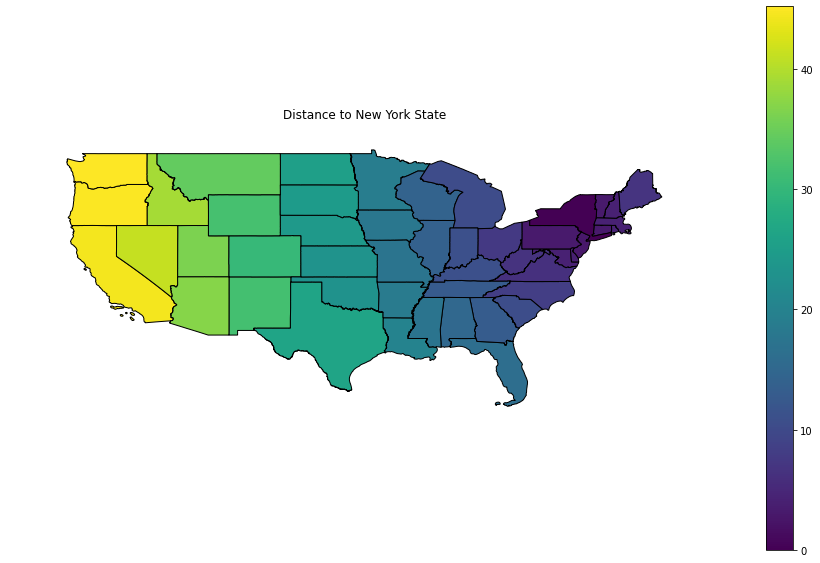

In [90]:
gplt.choropleth(gdf, figsize=(16,10), hue='distance_to_ny', legend=True)
plt.title('Distance to New York State')